##    Training a machine to play tictactoe using Reinforcement Learning

In [1]:
# say the entrys are 
# 1. - for not filled anything.
# 2. O for user1.
# 3. X for user2.

In [2]:
# Get all the possible states.

In [1]:
def display_board(board):
    
    for i in range(3):
        for j in range(3):
            print(board[i*3 + j], end="  ")
            
        print("\n")
        
display_board("-OXXXXO-O")

-  O  X  

X  X  X  

O  -  O  



In [30]:
def check_board(board):
    
    # board
    # 0 1 2 
    # 3 4 5
    # 6 7 8
    
    board = list(board)
    
    # vertical lines:
    if board[0]==board[3] and board[0]==board[6] and board[0]!="-":
        return True
    if board[1]==board[4] and board[1]==board[7] and board[1]!="-":
        return True
    if board[2]==board[5] and board[2]==board[8] and board[2]!="-":
        return True
    
    # horizontal lines:
    if board[0]==board[1] and board[0]==board[2] and board[0]!="-":
        return True
    if board[3]==board[4] and board[3]==board[5] and board[3]!="-":
        return True
    if board[6]==board[7] and board[6]==board[8] and board[6]!="-":
        return True
    
    # diagonal lines:
    if board[0]==board[4] and board[0]==board[8] and board[0]!="-":
        return True
    if board[2]==board[4] and board[2]==board[6] and board[2]!="-":
        return True

    return False

In [3]:
def get_possible_states(board, chance):

    possible_index = [i for i in range(9) if board[i]=="-"]
    
    possible_states = []
    for index in possible_index:
        board_list = list(board)
        board_list[index] = chance
        possible_states.append("".join(board_list))
    
    return possible_states

In [4]:
board = "-X-O--O--"
chance = 'X'
get_possible_states(board, chance)

['XX-O--O--', '-XXO--O--', '-X-OX-O--', '-X-O-XO--', '-X-O--OX-', '-X-O--O-X']

In [8]:
states = set()

chance = "O"
board = "-"*9

queue = [(board, chance)]

states.add(board)

lens = []
while len(queue) != 0:
    
    lens.append(len(queue))
    board, chance = queue.pop(0)
    
    possible_board_states = get_possible_states(board, chance)
    
    for possible_state in possible_board_states:
        states.add(possible_state)
    
    chance = "X" if chance=="O" else "O"
    
    for possible_state in possible_board_states:
        if not check_board(possible_state):
            queue.append((possible_state, chance))
    
    
chance = "X"
board = "-"*9

queue = [(board, chance)]

states.add(board)

while len(queue) != 0:
    
    lens.append(len(queue))
    board, chance = queue.pop(0)
    
    possible_board_states = get_possible_states(board, chance)
    
    for possible_state in possible_board_states:
        states.add(possible_state)
    
    chance = "X" if chance=="O" else "O"
    
    for possible_state in possible_board_states:
        if not check_board(possible_state):
            queue.append((possible_state, chance))

In [6]:
queue

[]

In [9]:
len(states)

8533

In [12]:
complete_states = []
for state in list(states):
    if check_board(state):
        complete_states.append(state)
print(len(complete_states))

1884


In [18]:

for i in range(10, 20):
    display_board(complete_states[i])
    print("\n\n")

-  -  X  

-  O  X  

O  -  X  




O  X  -  

O  X  -  

X  X  O  




X  O  O  

-  X  X  

O  -  X  




X  O  O  

O  X  -  

X  -  X  




X  O  -  

X  O  -  

-  O  -  




-  O  -  

X  O  -  

X  O  X  




-  O  -  

X  O  X  

-  O  X  




-  X  O  

-  O  X  

O  -  X  




O  O  X  

X  O  -  

X  O  X  




O  -  -  

X  X  X  

O  -  O  






## Making an episode

In [20]:
# Everytime machine will be first chance

# Machine O
# human X (human is a random player)

In [200]:
len(states)  # total states

8533

In [201]:
states_dic = {}
for s in states:
    states_dic[s] = []

In [202]:
len(states_dic.items())

8533

In [243]:
# gathering Episodes..

In [205]:
import random

# win count of each
machine, human, draw = 0,0,0

Episode_reward = []
no_of_episodes = 200000

for i in range(no_of_episodes):
    
    # A new game/episode starts here
    chance = "O"
    board = "-"*9

    BOARDS = []
    while True:

        BOARDS.append(board)
        
        possible_board_states = get_possible_states(board, chance)

        if len(possible_board_states) > 0:
            board = random.choice(possible_board_states)
        else:
            draw += 1
            Episode_reward.append((BOARDS, 0))
            break
        
        if check_board(board):
            if chance=="O":
                BOARDS.append(board)
                Episode_reward.append((BOARDS, 1))
                machine += 1
            else:
                BOARDS.append(board)
                Episode_reward.append((BOARDS, -1))
                human +=1
            break
        
        if not (board in states):
            print("board not in states:", board)
            break
        chance = "X" if chance=="O" else "O"
        

print("\n\n", machine, human, draw)



 116768 57818 25414


In [206]:
len(Episode_reward)

200000

## Updating the policy

In [208]:
# now that we got n no.of episodes..
# we will start updating states_dic

In [223]:
def calculate_rewards(b, r): # b -> sequence of board states in an episode, r -> reward for that episode
    l = len(b)
    
    current_reward = r
    rewards = []
    
    for i in range(l):
        rewards.append(current_reward)
        current_reward *= gamma
        
    return rewards[::-1]

In [224]:
# discounting factor
gamma = 0.9

for B, R in Episode_reward:
    rewards = calculate_rewards(B, R)
    
    for b, r in zip(B, rewards):
        states_dic[b].append(r)

In [232]:
policy_dic = {}
for s in states:
    policy_dic[s] = 0

In [233]:
from statistics import mean
for s in states:
    if len(states_dic[s]):
        policy_dic[s] = mean(states_dic[s])

In [236]:
list(policy_dic.values())

[-0.048538461538461544,
 0,
 0,
 0.2838347107438017,
 0,
 -0.060122950819672144,
 0,
 0.04774787234042552,
 0,
 0.5900233695652174,
 0,
 -0.07547307692307692,
 0,
 0.9,
 0.48960000000000004,
 0,
 -0.03944797297297295,
 0.4983988826815643,
 0.31131147540983606,
 0.81,
 0.4569352941176471,
 0,
 1,
 0.27579076877028497,
 -0.030828729281767938,
 0,
 0.38616279069767445,
 0,
 -0.9,
 0.1975623287671233,
 -1,
 1,
 0.08448675496688744,
 0.256912352186589,
 0.46125000000000005,
 0.6599646640316207,
 -1,
 0.42913907284768216,
 0,
 0.13534200000000002,
 -0.07221774193548389,
 0,
 0.36059246231155784,
 -0.07575539568345323,
 0,
 0,
 -0.28285714285714286,
 -0.5422881355932204,
 0.5790000000000001,
 0.1504442307692308,
 1,
 -0.044999999999999984,
 0,
 0,
 0,
 -0.07821974522292993,
 0,
 -0.3420823943661972,
 0.49900781250000004,
 0.9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0.6498595041322315,
 0.5244394736842106,
 0.8448842975206612,
 0,
 -0.258631875,
 -0.06443181818181817,
 0,
 0,
 0,
 0,
 0,
 0.292125,


In [242]:
# save the policy

In [240]:
import pickle
with open("policy.pkl", 'wb') as f:
    pickle.dump(policy_dic, f)

## Playing game with latest policy against random choice

In [321]:
human, machine, draw = 0, 0, 0

In [958]:
import random
import numpy as np
# A new game/episode starts here
chance = "O"
board = "-"*9

while True:
    
    possible_board_states = get_possible_states(board, chance)

    if len(possible_board_states) > 0:
        if chance == "X":
            board = random.choice(possible_board_states)
        else:
            index = np.argmax([policy_dic[s] for s in possible_board_states])
            board = possible_board_states[index]
    else:
        draw += 1
        print("Draw")
        break

    if check_board(board):
        if chance=="O":
            machine += 1
            print("Machine Won")
        else:
            human += 1
            print("Human Won")
        break
    
    chance = "X" if chance=="O" else "O"
    display_board(board)
    print("\n\n")
    
display_board(board)
print("\n\n", machine, human, draw)

-  -  -  

-  O  -  

-  -  -  




-  -  -  

X  O  -  

-  -  -  




-  -  -  

X  O  -  

O  -  -  




-  -  -  

X  O  -  

O  -  X  




Machine Won
-  -  O  

X  O  -  

O  -  X  



 630 0 7


## Playing against me

In [961]:
import random
import numpy as np

# A new game/episode starts here
chance = "O"
board = "-"*9

while True:
    
    possible_board_states = get_possible_states(board, chance)

    if len(possible_board_states) > 0:
        if chance == "X":
            board = input("Enter board: ")
        else:
            index = np.argmax([policy_dic[s] for s in possible_board_states])
            board = possible_board_states[index]
    else:
        print("Draw")
        break

    if check_board(board):
        if chance=="O":
            print("Machine Won")
        else:
            print("Human Won")
        break
    
    chance = "X" if chance=="O" else "O"
    display_board(board)
    print("\n\n")
    
display_board(board)
print("\n\n", machine, human, draw)

-  -  -  

-  O  -  

-  -  -  






KeyboardInterrupt: Interrupted by user

## Ploting lens

In [10]:
import matplotlib.pyplot as plt

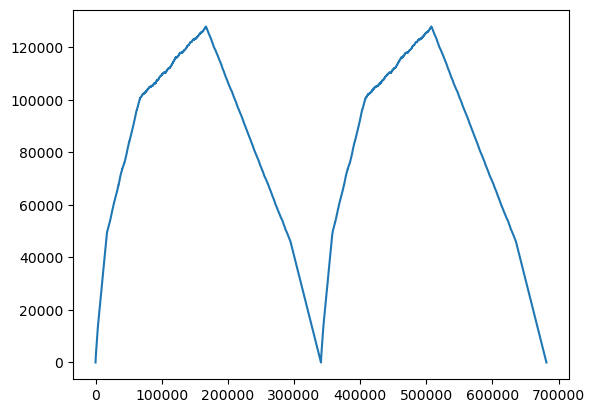

In [11]:
plt.plot(lens)

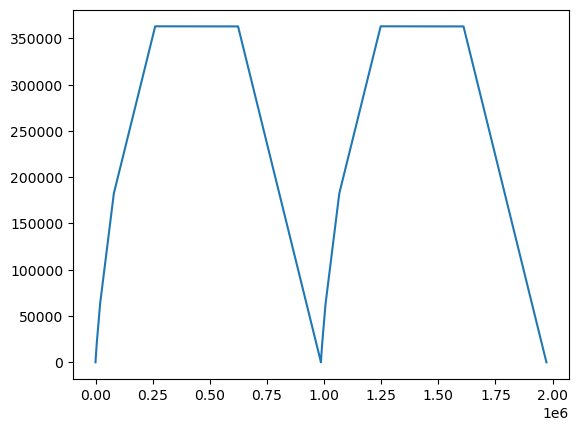

In [13]:
plt.plot(lens)